<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering With Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1) Import the data.

In [2]:
seeds = pd.read_csv("seeds.csv")

In [3]:
# Taking a peek:
seeds.head()

area  perimeter  compactness  length  width  asymmetry_coeff  \
0  15.26      14.84       0.8710   5.763  3.312            2.221   
1  14.88      14.57       0.8811   5.554  3.333            1.018   
2  14.29      14.09       0.9050   5.291  3.337            2.699   
3  13.84      13.94       0.8955   5.324  3.379            2.259   
4  16.14      14.99       0.9034   5.658  3.562            1.355   

   groove_length  species  
0          5.220        1  
1          4.956        1  
2          4.825        1  
3          4.805        1  
4          5.175        1

### 2) Perform some exploratory data analysis of relationships between features.

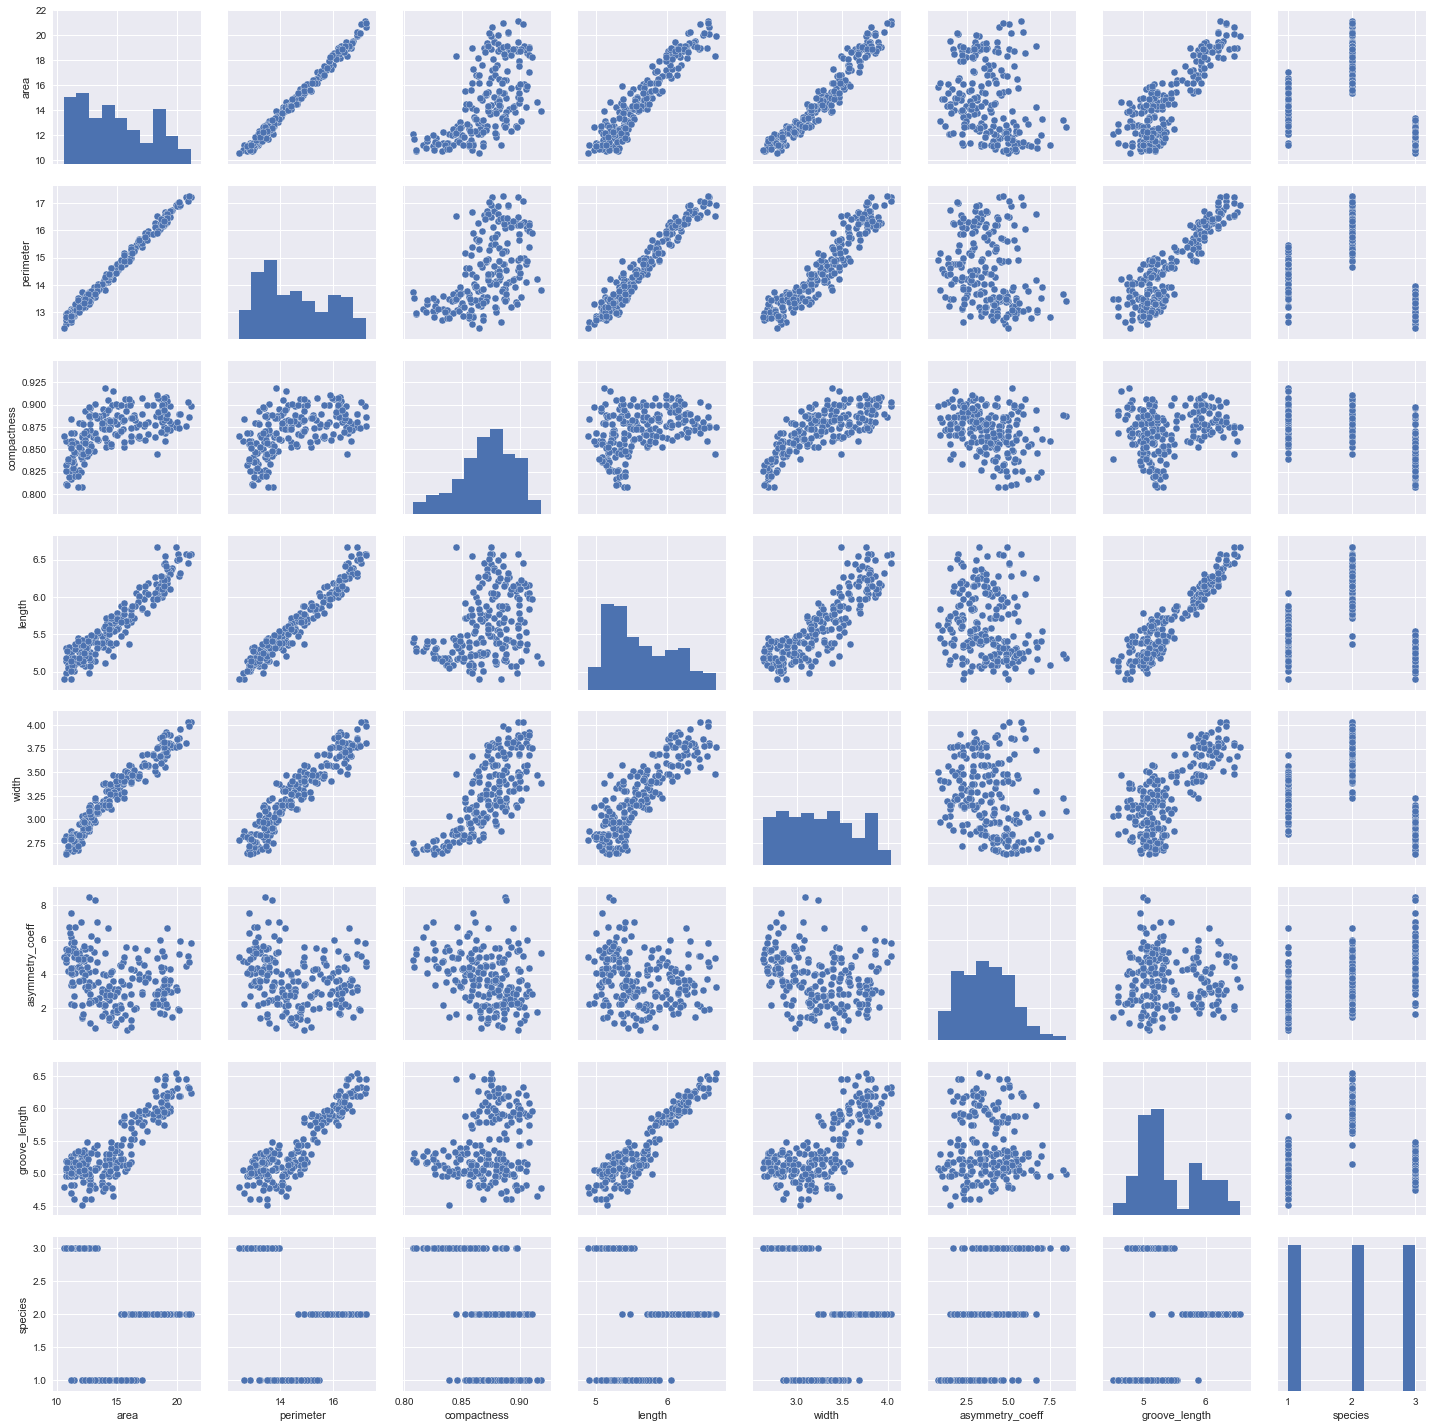

In [4]:
# Plot the data to see the distributions and relationships.
import seaborn as sns

# Plot without the "species" hue.
sns.pairplot(seeds)

Can we see clusters within these scatterplots just by looking at them?

- *groove_length vs. compactness looks like two clusters.*  
- *Perimeter vs. groove_length possibly has three clusters.*

In [5]:
# Check for NULLs.
seeds.isnull().sum()
# There is a value for every position in the DataFrame.

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

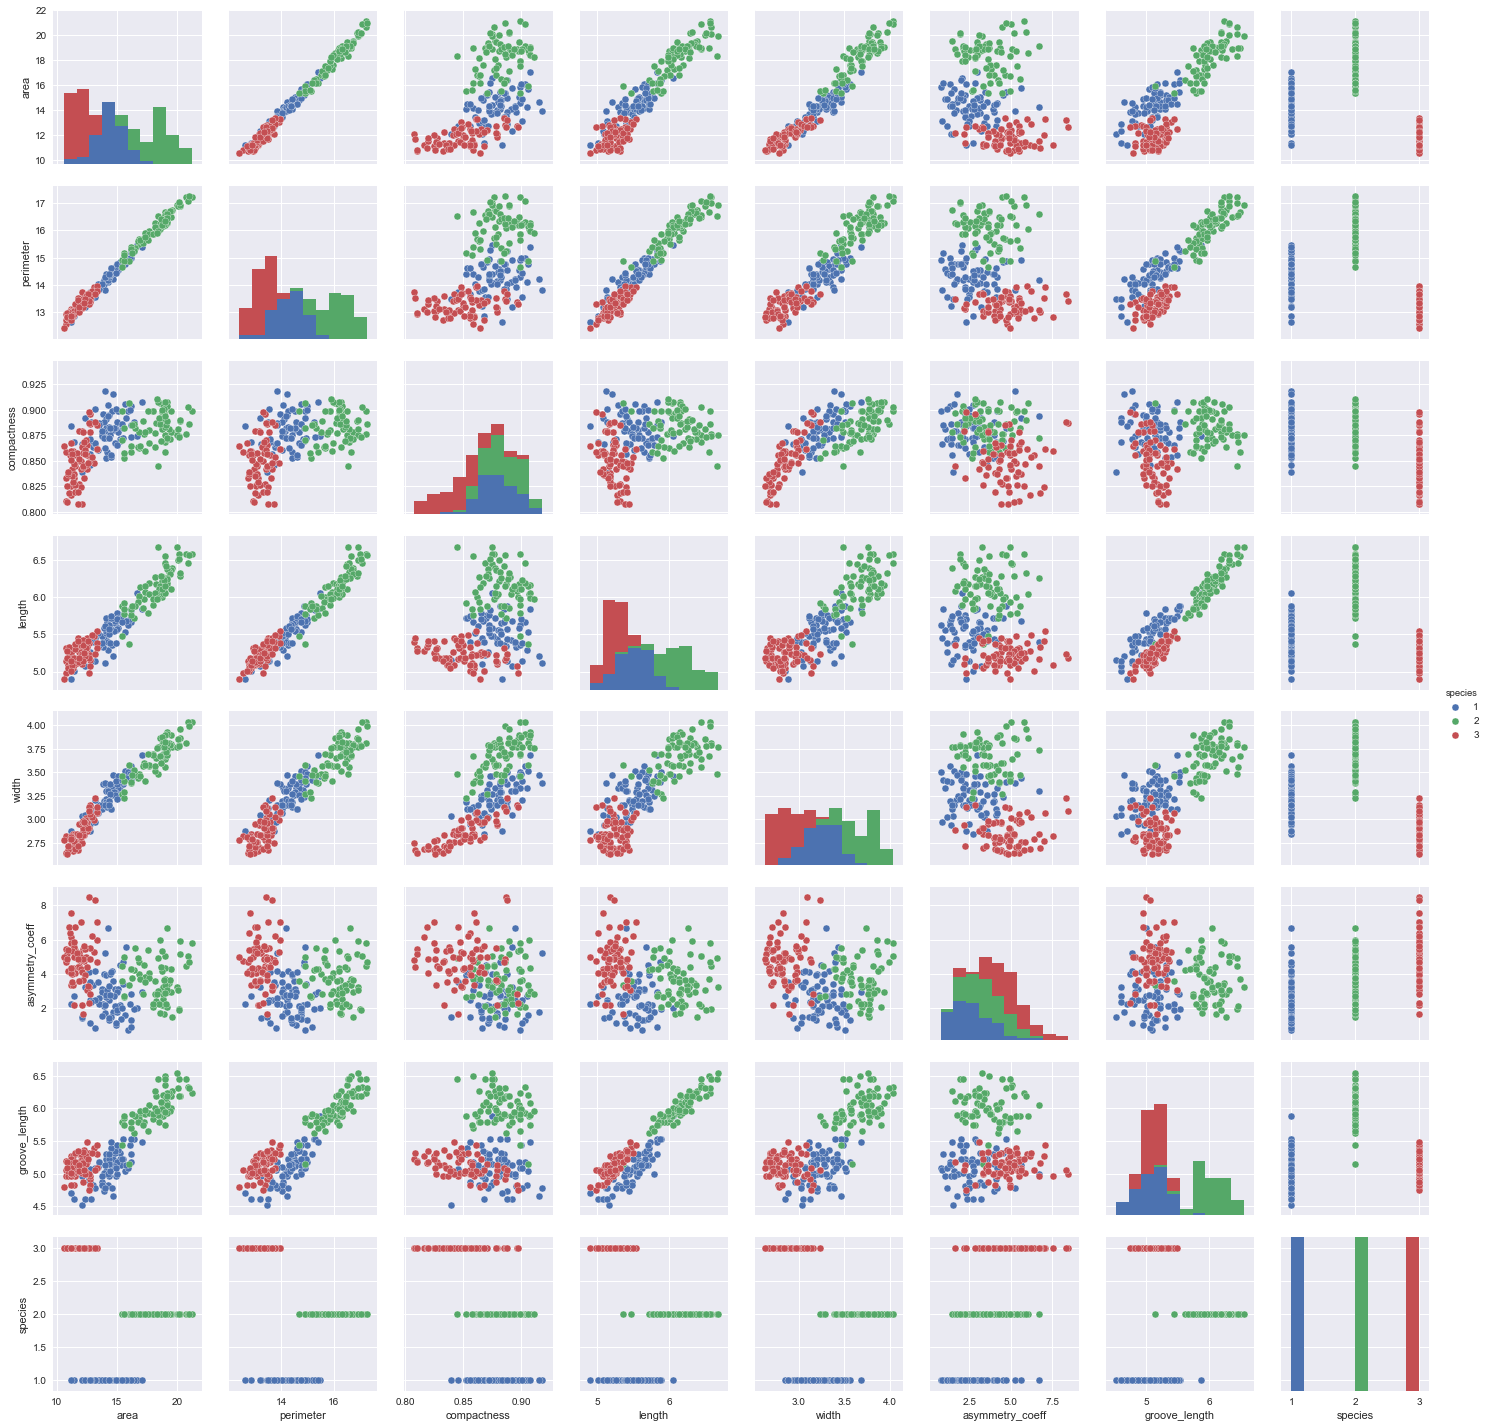

In [6]:
# Look at the real species labels.
sns.pairplot(data=seeds, hue='species')
# Classes appear to have a similar number of samples.
# Blue consistently looks like the divisor between the green and red classes.

Remember, clustering is an unsupervised learning method, so known classes will never exist. In this situation, we can see that `perimeter` vs. `groove_length` is a good visualization to view the proper classes and can be used later to compare the results of clustering to a true value.

In [7]:
seeds.species.value_counts()
# All classes are equally distributed. 

3    70
2    70
1    70
Name: species, dtype: int64

In [8]:
# Check data types.
seeds.dtypes
# We have an oddity: the species column.

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

### 3) Prepare the data for clustering.

1) Remove the `species` column. We'll see if the clusters from k-means end up like the actual species.
2) Put the features on the same scale.

In [9]:
# Drop the species column, which is currently acting as a target (categorical).
X = seeds.drop('species', axis = 1)
y = seeds.species

### 4) Cluster with k-means.

- Cluster the data to our target groups.
- We know that there are three actual classes. However, in a real situation where we'd use clustering, we would have no idea how many classes existed. Let's first try using the default `k` for `KMeans`(8).

In [10]:
from sklearn.cluster import KMeans

# Two clusters.
k_mean = KMeans()
k_mean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 5) Get the labels and centroids for our first clustering model.

In [11]:
# Labels and centroids for eight clusters:
labels = k_mean.labels_
print labels
clusters = k_mean.cluster_centers_
clusters

[4 4 7 7 4 7 7 7 4 4 1 4 7 7 7 7 7 4 4 5 7 7 4 0 4 4 0 0 7 7 0 7 7 7 4 4 1
 1 7 3 7 0 0 1 7 0 4 7 7 4 7 1 7 7 4 4 7 4 4 0 0 0 0 7 0 0 4 7 4 0 1 1 1 6
 1 1 1 2 2 1 1 2 2 6 6 6 6 6 2 2 6 6 6 2 2 1 6 6 6 6 1 6 2 6 6 6 6 1 6 6 6
 6 6 2 2 6 2 6 6 6 2 6 1 6 1 2 2 6 6 1 6 6 1 1 1 7 1 4 4 1 3 3 3 3 5 3 0 5
 0 5 5 3 5 5 5 3 5 5 5 5 0 5 5 5 3 0 5 5 5 5 3 3 5 5 5 5 5 5 3 0 5 5 5 5 3
 5 5 5 3 5 5 5 5 5 5 5 3 7 0 0 3 0 5 3 5 5 5 3 5 3]


array([[ 12.54545455,  13.47227273,   0.86816364,   5.23218182,
          2.99004545,   2.36491364,   4.93181818],
       [ 16.55916667,  15.38875   ,   0.87839167,   5.88129167,
          3.48145833,   4.19570833,   5.718875  ],
       [ 19.58333333,  16.646     ,   0.88772667,   6.31586667,
          3.83506667,   5.08153333,   6.1444    ],
       [ 12.28      ,  13.41631579,   0.85591579,   5.28047368,
          2.93836842,   6.43410526,   5.14173684],
       [ 15.30304348,  14.77173913,   0.88102609,   5.6766087 ,
          3.34830435,   1.7277    ,   5.28082609],
       [ 11.64659091,  13.15681818,   0.84505455,   5.20677273,
          2.80931818,   4.5045    ,   5.09772727],
       [ 18.95454545,  16.38878788,   0.8868    ,   6.24748485,
          3.74469697,   2.72354545,   6.11945455],
       [ 14.25233333,  14.255     ,   0.88133333,   5.49463333,
          3.24733333,   3.2678    ,   5.0794    ]])

### 6) Compute the silhouette score and visually examine the results of the eight clusters.

_`pairplot` with hue._

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels)

0.36325450663659165

In [13]:
# Considering that silhouette is on a scale of negative one to one, 0.35 isn't too bad.

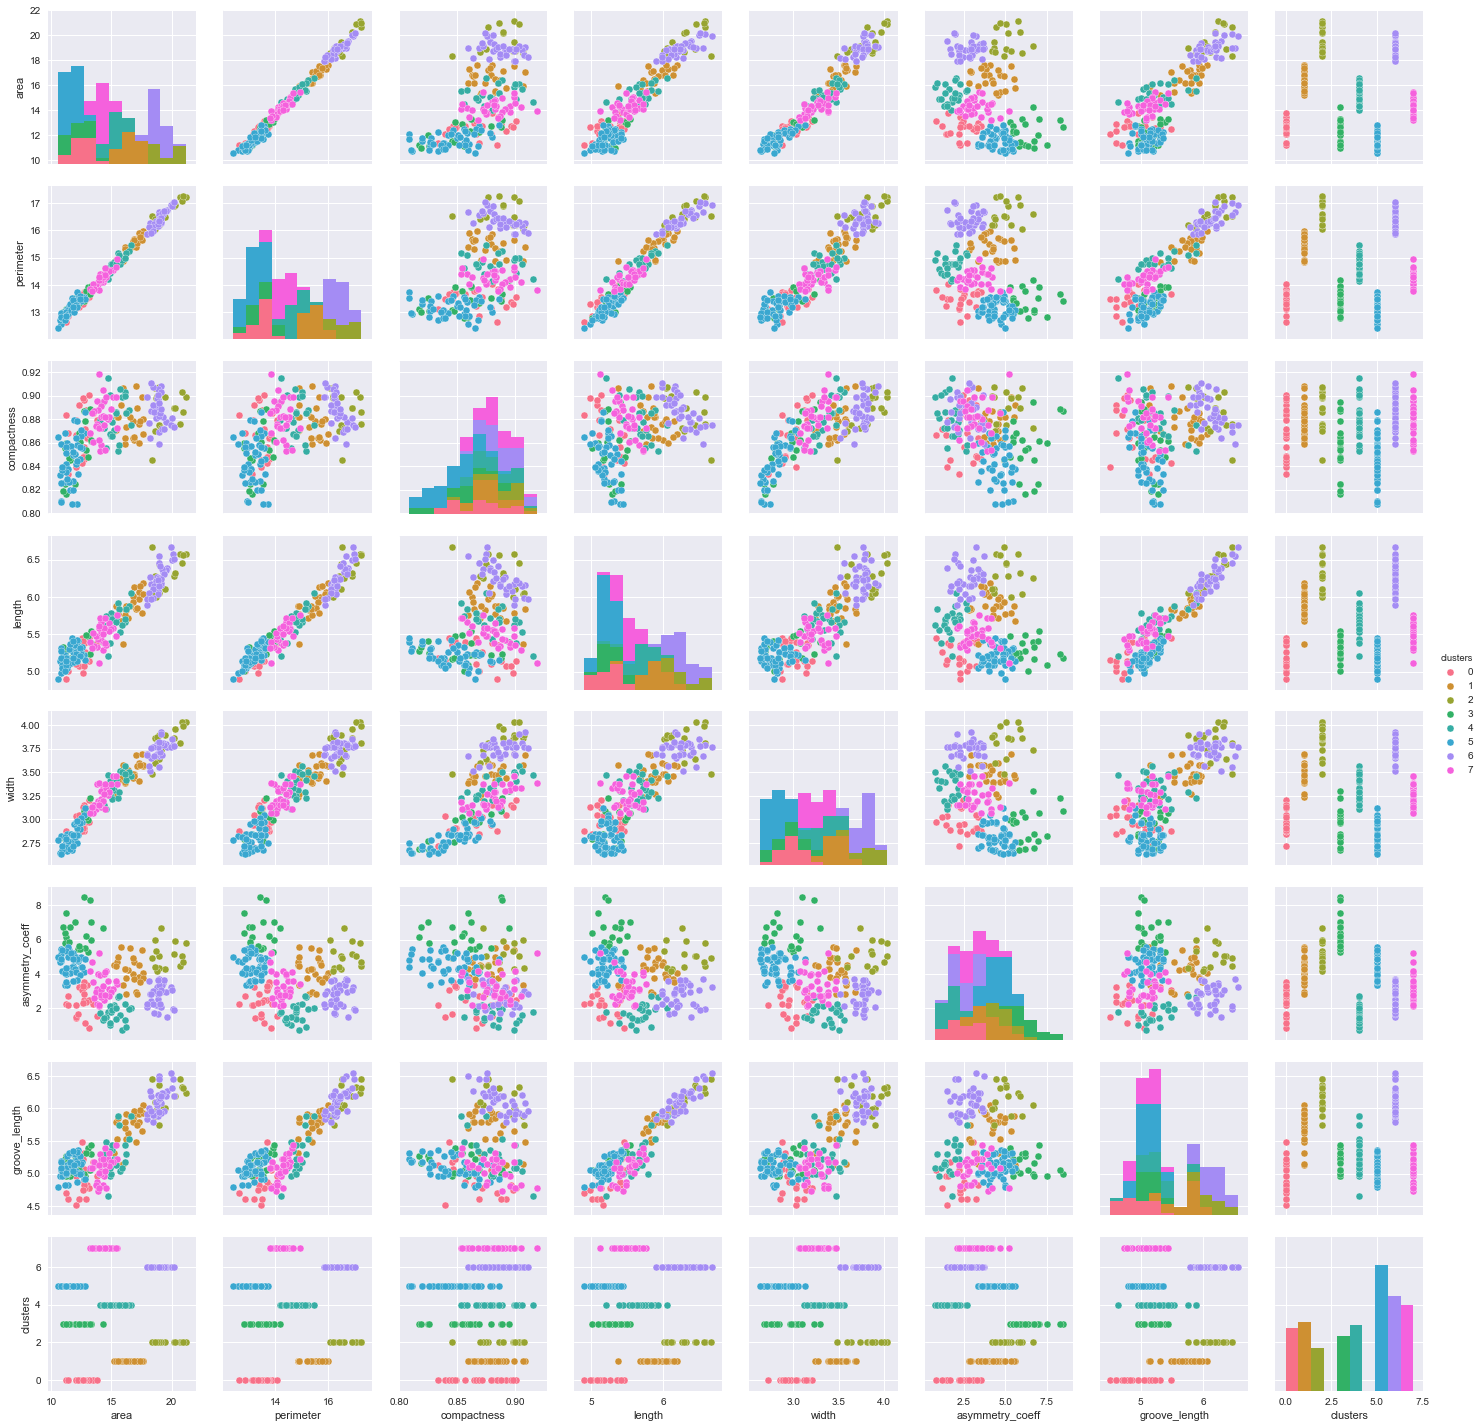

In [14]:
# Visually examine the clusters that have been created.
X_8 = seeds.drop('species', axis=1)
X_8['clusters']=labels

sns.pairplot(data=X_8, hue='clusters')

### 7) Repeat Steps 4 and 6 with two selected or random `k` values and compare the results to the `k=8` model.

In [15]:
import random

random.randint(1,25), random.randint(1,25)

(15, 2)

In [16]:
# Four clusters:
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(X)
labels_4 = k_mean4.labels_
silhouette_score(X, labels_4)

0.39646457495739751

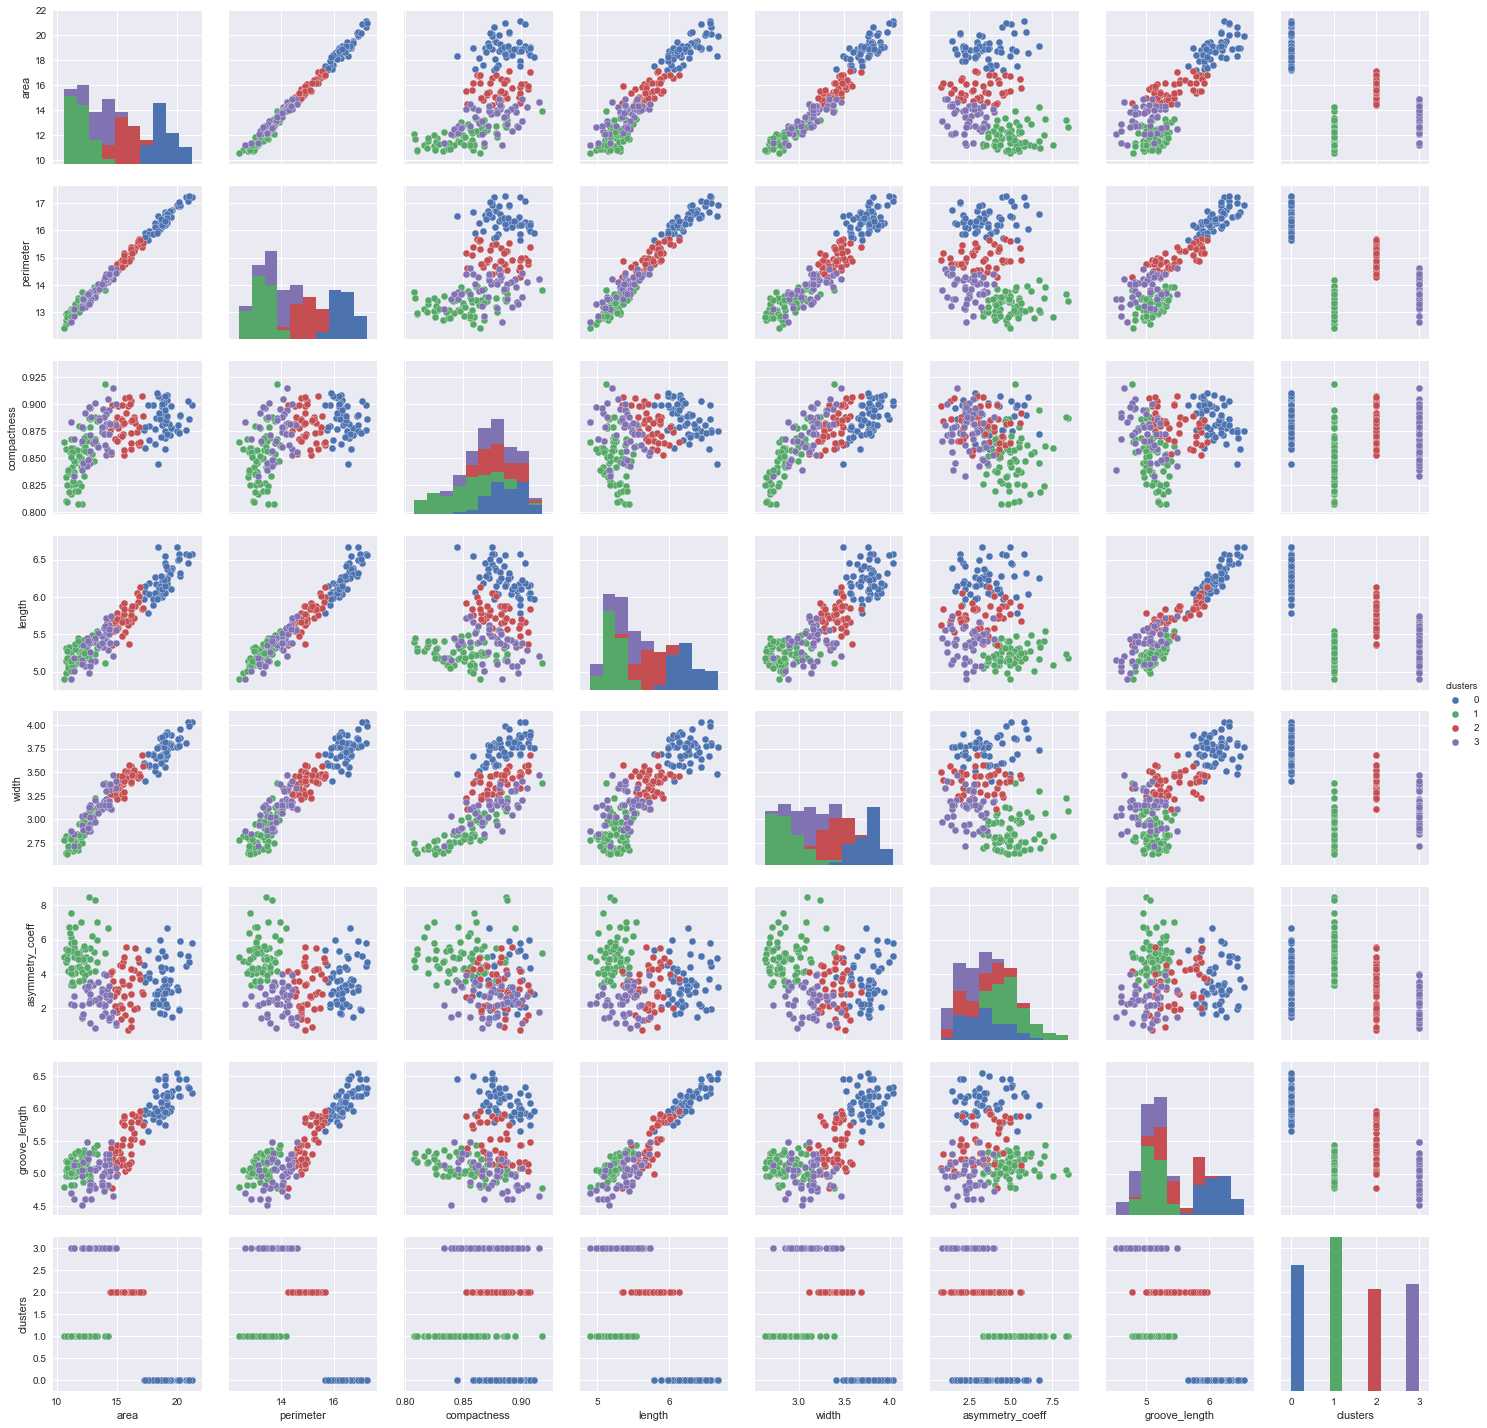

In [17]:
X_4 = seeds.drop('species', axis=1)
X_4['clusters']=labels_4

sns.pairplot(data=X_4, hue='clusters')

In [18]:
# K=4 was the best performing of the ks tested here.
# It looks like the scatterplot of perimeter vs. asymmetry_coefficient
# distinguished the cluster best.

In [19]:
# Six clusters:
k_mean6 = KMeans(n_clusters=6)
k_mean6.fit(X)
labels_6 = k_mean6.labels_
silhouette_score(X, labels_6)

0.36083938316465336

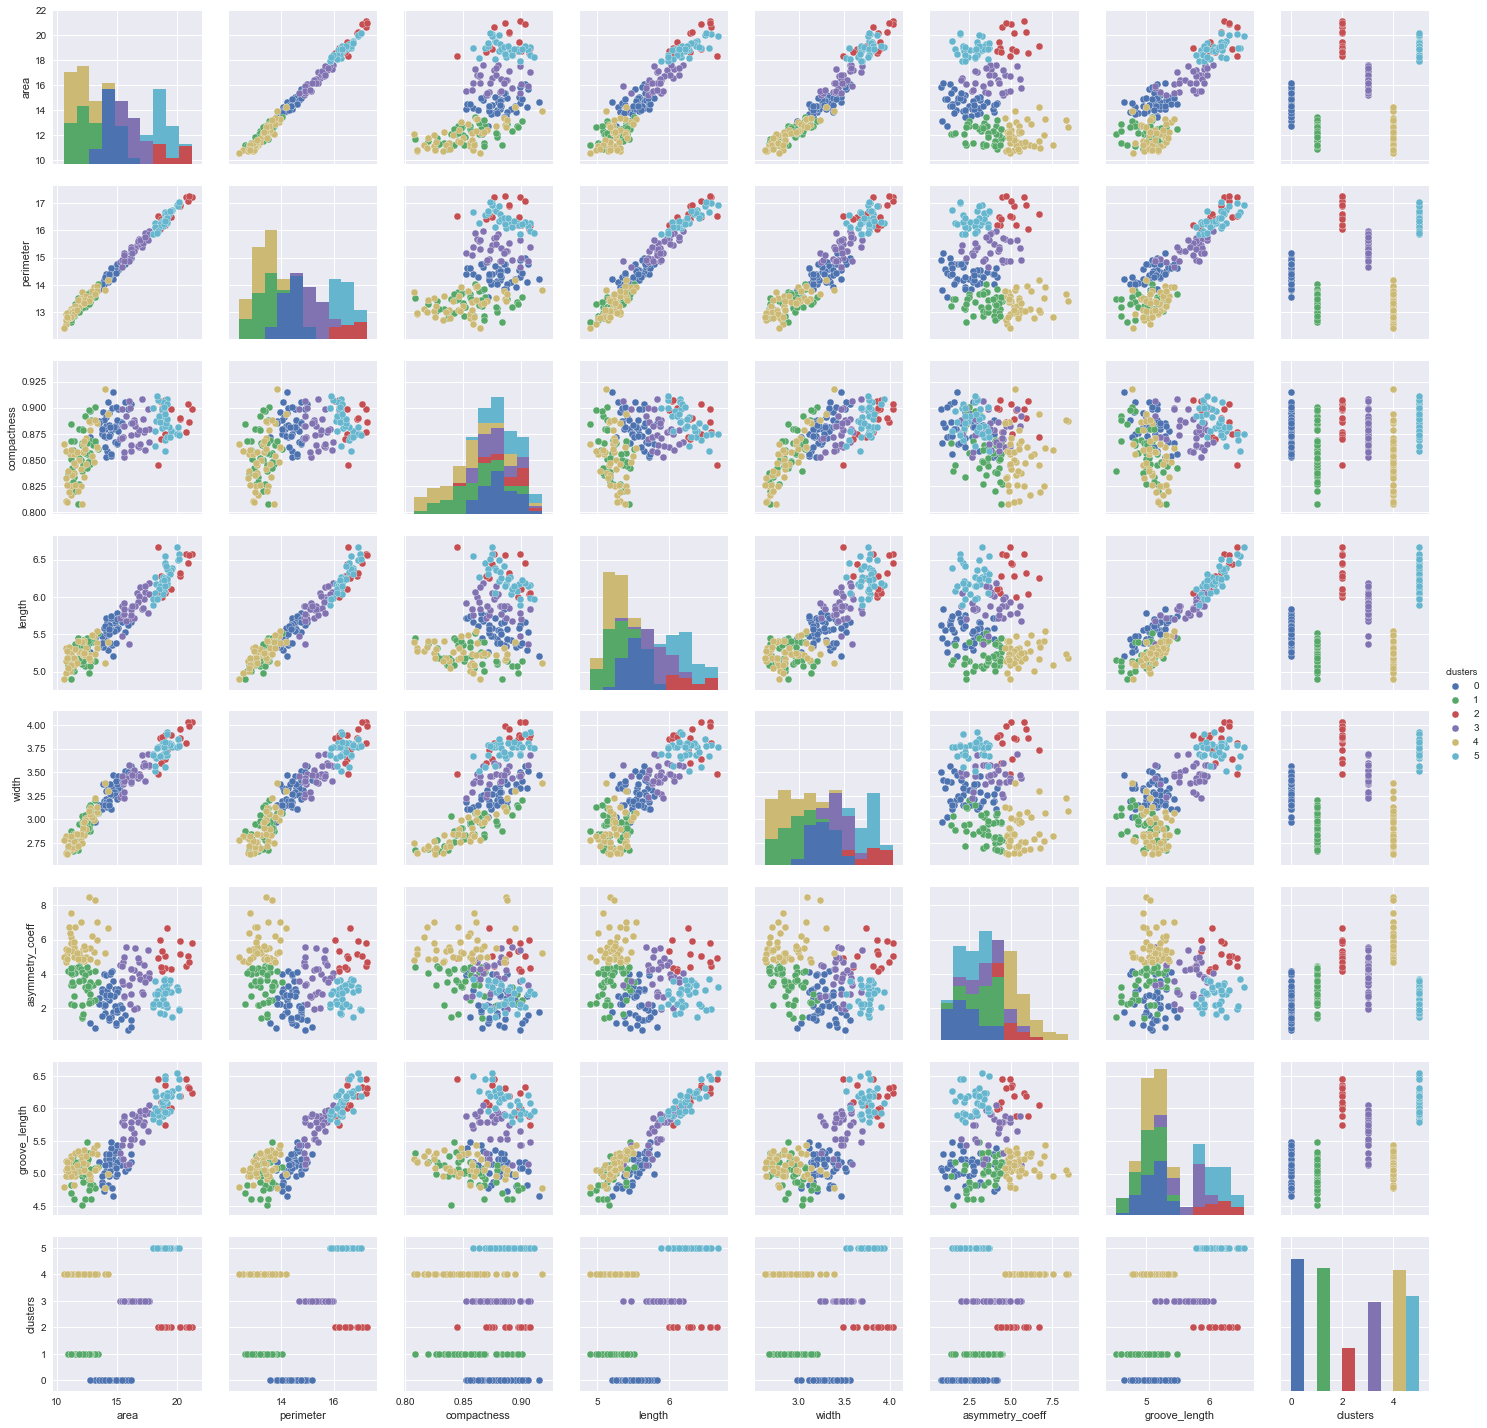

In [20]:
X_6 = seeds.drop('species', axis=1)
X_6['clusters']=labels_6

sns.pairplot(data=X_6, hue='clusters')

In [21]:
# Perimeter vs. asymmetry_coefficient and area vs. asymmetry_coefficient
# visually distinguished the clusters best.

### 8) Build a function to find the optimal number of clusters, using silhouette score as the criteria.

1) The function should accept a range and a DataFrame as arguments.
2) It returns the optimal `k` value, the associated silhouette, and the scaling method.
3) Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, and `MinMaxScaler`.


Once you've found the optimal `k` and version of the data, visualize the clusters.





In [22]:
# Necessary processing imports:
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

In [23]:
# Create DataFrame to append information.
results = pd.DataFrame(columns = ['k','silhouette','processing'])


def cluster(ran, data, version):
    for k in ran:
        k_means = KMeans(n_clusters=k)
        k_means.fit(data)
        labels = k_means.labels_
        score = silhouette_score(data, labels)
        results.loc[len(results)]=['c'+str(k), score, version]

In [24]:
def opt_cluster(ran, data):
    cluster(ran, data, 'default')
    
    # Normalized version:
    Xn = normalize(data)
    cluster(ran, Xn, 'normalized')
    
    # Standard scale version:
    SS = StandardScaler()
    Xs = SS.fit_transform(data)
    cluster(ran, Xs, 'standard_scaler')
    
    # Min/max scale version:
    MM = MinMaxScaler()
    Xmm = MM.fit_transform(data)
    cluster(ran, Xmm, 'min_max_scaler')

    return results.loc[results['silhouette'].idxmax()]


In [25]:
ran = range(2,12)

opt_cluster(ran,X)

k                   c2
silhouette    0.518287
processing     default
Name: 0, dtype: object

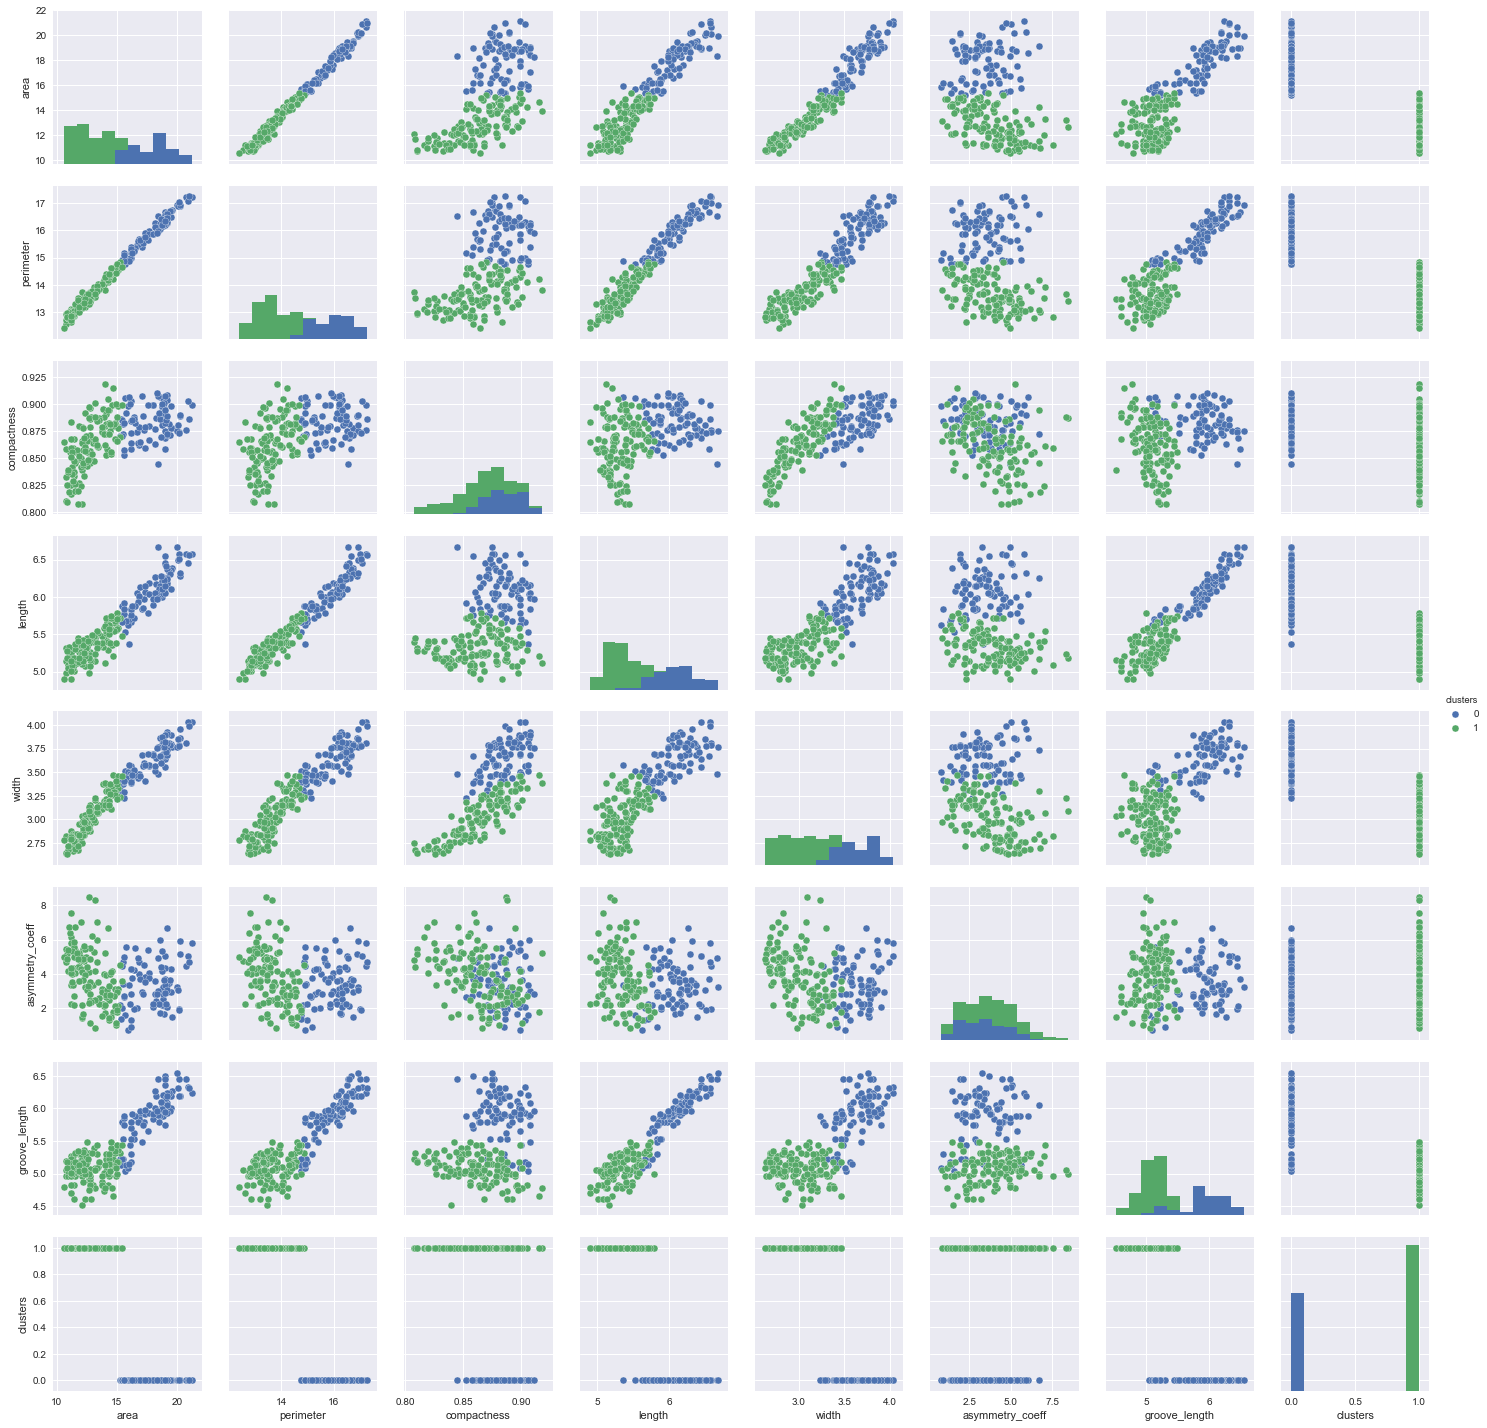

In [26]:
# Build the model with the found optimal parameters.
k_mean_opt = KMeans(n_clusters=2)
k_mean_opt.fit(X)
labels_opt = k_mean_opt.labels_

# No pre-processing is required, as the default was the highest silhouette.
X_opt = seeds.drop('species', axis=1)

X_opt['clusters']=labels_opt
sns.pairplot(data=X_opt, hue='clusters')


As we can see, the difference between our exploratory analysis with the original data and the results of finding an optimal clustering model silhouette score can be an untrustworthy means of evaluating a cluster. Because this is an unsupervised model, it will jump to conclusions that we know may not be true.   

In this situation, the non-processed data performed better than the processed data, but there are a variety of cases in which the opposite is true. Pre-processing and scaling are important steps to take when clustering in order to negate the effects outliers could have on clusters. 
 
One of the more highly recommended scaling tactics is `MinMax`. With it, you can somewhat control the range/magnitude of your scale within multiple dimensions and augment your data in ways that could be more beneficial to the convergence of k-means.